In [1]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

# Plib imports
import Plib.DataFarm.PReader as prd
import Plib.DataFarm.MStack as ms    #30Y hist. stock, realtime, intraday, 75 indices
import Plib.DataFarm.Fprep as fp     #Stock fundamentals, forex, crypto, form13F, Earnings, Ipo
import Plib.DataFarm.Tiingo as ti    #Stock fundamentals, forex, crypto, news
import Plib.DataFarm.Alphav as av    #Stock, realtime, intraday, simpl. fundam., forex, crypto
import Plib.DataFarm.Finnhub as fh   #Stock, fundamentals, etf, estimates,IPOs
import Plib.DataFarm.IEXdata as iex  #Stock, options, fundam.+research,forex,crypto,news,comm
import Plib.DataFarm.Kibot as kb

#import Plib.DataFarm.Quandl as qdl   #Futures
import Plib.DataFarm.EODQuotes as eod

In [2]:
symbol='IWM'
dt_start='2022-07-01'
dt_end='2022-08-29'

In [3]:
#KIBOT########################

In [8]:
kb.search('$XDN')

Symbol Exchange   Description       Industry         Sector  StartDate
903   $XDN       US  JAPANESE YEN  Not available  Not available  6/20/2007

In [9]:
kb.getRTData(['JY','MSFT'], tz='America/New_York')

Symbol  Open  High  Low   Close   Volume  \
Date                                                                 
2022-09-16 07:49:26-04:00   MSFT   0.0   0.0  0.0  243.37  42106.0   

                           Prev_close  Change  Change_p  
Date                                                     
2022-09-16 07:49:26-04:00      245.38   -2.01     -0.82

In [6]:
kb.getData('SPY',sd=dt_start,ed=dt_end,regsess_only=False, ctype='etf',tz='America/New_York').head(2)


Open    High    Low   Close  Adjusted_close  \
Date                                                                       
2022-07-01 01:00:00-04:00  376.53  381.70  373.8  381.20          381.20   
2022-07-05 01:00:00-04:00  375.85  381.98  372.9  381.95          381.95   

                             Volume  
Date                                 
2022-07-01 01:00:00-04:00  59608295  
2022-07-05 01:00:00-04:00  64978768

In [7]:
kb.getData('A',sd=dt_start,ed=dt_end,regsess_only=False, ctype='stock',tz='America/New_York').head(2)


Open     High     Low   Close  Adjusted_close  \
Date                                                                         
2022-07-01 01:00:00-04:00  118.79  119.760  116.70  119.23          119.23   
2022-07-05 01:00:00-04:00  117.75  120.675  116.49  120.57          120.57   

                           Volume  
Date                               
2022-07-01 01:00:00-04:00  797580  
2022-07-05 01:00:00-04:00  707225

In [8]:
kb.get_eod_dataFX('EUR','USD',dt_start, dt_end, adj=0).head(2)

Open     High      Low    Close  Adjusted_close  \
Date                                                                            
2022-07-01 01:00:00-04:00  1.04837  1.04854  1.03652  1.04266         1.04266   
2022-07-04 01:00:00-04:00  1.04193  1.04627  1.04171  1.04178         1.04178   

                           Volume  
Date                               
2022-07-01 01:00:00-04:00  377291  
2022-07-04 01:00:00-04:00  202159

In [8]:
kb.getContFuture('JY', '08/29/1961', '08/29/2022', adj=0).head(2)


Open    High     Low   Close  Adjusted_close  \
Date                                                                        
1995-09-13 01:00:00-04:00  0.0100  0.0101  0.0099  0.0099          0.0099   
1995-09-14 01:00:00-04:00  0.0099  0.0099  0.0098  0.0099          0.0099   

                           Volume  
Date                               
1995-09-13 01:00:00-04:00       4  
1995-09-14 01:00:00-04:00       4

In [9]:
kb.getContFuture('JYF18', '08/29/1961', '08/29/2022', adj=0).head(2)


Open      High       Low     Close  \
Date                                                                
2017-08-01 01:00:00-04:00  0.009138  0.009138  0.009138  0.009138   
2017-08-02 01:00:00-04:00  0.009114  0.009114  0.009114  0.009114   

                           Adjusted_close  Volume  
Date                                               
2017-08-01 01:00:00-04:00        0.009138       0  
2017-08-02 01:00:00-04:00        0.009114       0

In [ ]:
#MarketStack########################

In [4]:
edf=ms.getExchanges()
edf.head(200)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:91: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data'])


name   mic    country          city  \
0         NASDAQ Stock Exchange  XNAS        USA      New York   
1       New York Stock Exchange  XNYS        USA      New York   
2                     NYSE ARCA  ARCX        USA      New York   
3                   OTC Markets  OTCM        USA      New York   
4   Buenos Aires Stock Exchange  XBUE  Argentina  Buenos Aires   
..                          ...   ...        ...           ...   
64            OTCQB Marketplace  OTCB        USA      New York   
65            OTCQX Marketplace  OTCQ        USA      New York   
66             OTC PINK current  PINC        USA      New York   
67           Investors Exchange  IEXG        USA      New York   
68                        INDEX  INDX       None          None   

     currency.name currency.code               timezone.timezone  
0        US Dollar           USD                America/New_York  
1        US Dollar           USD                America/New_York  
2        US Dollar           USD                America/New_York  
3        US Dollar           USD                America/New_York  
4   Argentine Peso           ARS  America/Argentina/Buenos_Aires  
..             ...           ...                             ...  
64       US Dollar           USD                America/New_York  
65       US Dollar           USD                America/New_York  
66       US Dollar           USD                America/New_York  
67       US Dollar           USD                America/New_York  
68             NaN           NaN                             NaN  

[69 rows x 7 columns]

In [9]:
edf[edf['currency.code']=='EUR']

name    mic      country       city currency.name  \
6             Euronext Brussels   XBRU      Belgium   Brussels          Euro   
16       Tallinn Stock Exchange   XTAL      Estonia    Tallinn          Euro   
17      Helsinki Stock Exchange   XHEL      Finland   Helsinki          Euro   
18               Euronext Paris   XPAR       France      Paris          Euro   
19               Deutsche Börse   XFRA      Germany  Frankfurt          Euro   
20              Börse Stuttgart   XSTU      Germany  Stuttgart          Euro   
21         Deutsche Börse Xetra  XETRA      Germany  Frankfurt          Euro   
28               Borsa Italiana   XMIL        Italy     Milano          Euro   
32                  Nasdaq Riga   XRIS       Latvia       Riga          Euro   
33               Nasdaq Vilnius   XLIT    Lithuania    Vilnius          Euro   
36           Euronext Amsterdam   XAMS  Netherlands  Amsterdam          Euro   
41        Warsaw Stock Exchange   XWAR       Poland     Warsaw          Euro   
42              Euronext Lisbon   XLIS     Portugal     Lisboa          Euro   
46      Belgrade Stock Exchange   XBEL       Serbia   Belgrade          Euro   
50  Bolsas y Mercados Españoles   BMEX        Spain     Madrid          Euro   
51     Stockholm Stock Exchange   XSTO       Sweden  Stockholm          Euro   

   currency.code timezone.timezone  
6            EUR   Europe/Brussels  
16           EUR    Europe/Tallinn  
17           EUR   Europe/Helsinki  
18           EUR      Europe/Paris  
19           EUR     Europe/Berlin  
20           EUR     Europe/Berlin  
21           EUR     Europe/Berlin  
28           EUR       Europe/Rome  
32           EUR       Europe/Riga  
33           EUR    Europe/Vilnius  
36           EUR  Europe/Amsterdam  
41           EUR     Europe/Warsaw  
42           EUR     Europe/Lisbon  
46           EUR   Europe/Belgrade  
50           EUR     Europe/Madrid  
51           EUR  Europe/Stockholm

In [2]:
df=ms.getIndexes(limit=80)
print(df[df['country']=='USA'].to_string())


/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:141: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data']['indexes'])


                                                  name           symbol country currency.name currency.code
7                          Dow Jones Composite Average         DJA.INDX     USA     US Dollar           USD
8                         Dow Jones Industrial Average         DJI.INDX     USA     US Dollar           USD
9                             Dow Jones Transportation         DJT.INDX     USA     US Dollar           USD
10                                        Dow Jones US        DJUS.INDX     USA     US Dollar           USD
11                                     US Dollar Index         DXY.INDX     USA     US Dollar           USD
17                                             S&P 500        GSPC.INDX     USA     US Dollar           USD
24                                    NASDAQ Composite        IXIC.INDX     USA     US Dollar           USD
26                                      S&P Midcap 400         MID.INDX     USA     US Dollar           USD
30                          

In [5]:
print(df[df['symbol']=='SPDAUDT.INDX'].to_string())


                                          name        symbol country currency.name currency.code
77  S&P 500 Dividends Aristocrats Total Return  SPDAUDT.INDX     USA     US Dollar           USD


/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:60: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data']['eod'])


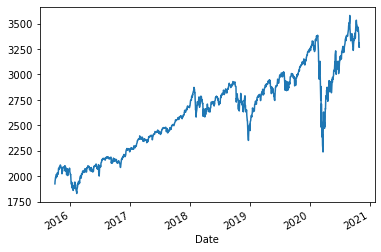

In [24]:
GSPC=ms.get_mstackHdata('GSPC.INDX',dt_start,dt_end,limit=80)
GSPC.Close.plot()

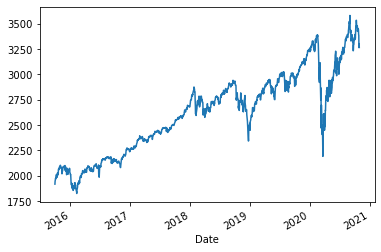

In [25]:
US500=ms.get_mstackHdata('US500.INDX',dt_start,dt_end,limit=80)
US500.Close.plot()

In [14]:
d=ms.get_mstackHdata('AVIO.XMIL','1990-01-01','2022-08-10',limit=80)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:58: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data']['eod'])


In [16]:
d.head()

Open   High   Low  Close  Adjusted_close   Volume
Date                                                          
2015-07-31  10.00  10.25  10.0  10.00          9.4158  41020.0
2015-08-03  10.09  10.09  10.0  10.00          9.4158  12220.0
2015-08-04  10.00  10.00  10.0  10.00          9.4158      0.0
2015-08-05  10.05  10.09   9.8  10.00          9.4158   8850.0
2015-08-06   9.80   9.97   9.8   9.97          9.3876    800.0

In [10]:
df=ms.getExchangeTickers('XMIL')
df.head(200)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:117: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data'])


name      symbol  has_intraday  has_eod
0        MICROSOFT CORP   MSFT.XMIL         False     True
1                 APPLE   AAPL.XMIL         False     True
2                AMAZON   AMZN.XMIL         False     True
3     ALPHABET CLASSE C   GOOG.XMIL         False     True
4     ALPHABET CLASSE A  GOOGL.XMIL         False     True
..                  ...         ...           ...      ...
195                AVIO   AVIO.XMIL         False     True
196              CEMBRE    CMB.XMIL         False     True
197         DEA CAPITAL    DEA.XMIL         False     True
198           A.S. ROMA    ASR.XMIL         False     True
199  BCO DESIO BRIA RNC   BDBR.XMIL         False     True

[200 rows x 4 columns]

In [12]:
print(df)

                                                 name      symbol  \
0                                      MICROSOFT CORP   MSFT.XMIL   
1                                               APPLE   AAPL.XMIL   
2                                              AMAZON   AMZN.XMIL   
3                                   ALPHABET CLASSE C   GOOG.XMIL   
4                                   ALPHABET CLASSE A  GOOGL.XMIL   
..                                                ...         ...   
11  Hanetf Icav - Grayscale Future Of Finance Ucit...   GFOF.XMIL   
12               ETC Group Global Metaverse UCITS ETF   METR.XMIL   
13      HANetf ICAV - Sprott Uranium Miners UCITS ETF   U3O8.XMIL   
14                                  SAIPEM SPA RIGHTS  SPMAA.XMIL   
15                           Industrie De Nora S.p.A.    DNR.XMIL   

    has_intraday  has_eod  
0          False     True  
1          False     True  
2          False     True  
3          False     True  
4          False     True  
.. 

In [7]:
df=ms.getExchangeTickers('XNYS')
df.head(2)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:120: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data'])


name symbol  has_intraday  has_eod
0  Alibaba Group Holding Ltd   BABA         False     True
1     BERKSHIRE HATHAWAY INC  BRK.B         False    False

In [8]:
len(df)

100

In [6]:
ms.get_mstackHdata(symbol,dt_start,dt_end,limit=80).head(2)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:60: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data']['eod'])


Open   High    Low  Close  Adjusted_close      Volume
Date                                                              
2015-10-01  13.79  13.99  13.35  13.41       12.996971  54110108.0
2015-10-02  13.95  14.50  13.88  14.49       14.043707  98242132.0

In [7]:
ms.getExchanges(limit=50).head(2)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:94: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data'])


name   mic country      city currency.name  \
0    NASDAQ Stock Exchange  XNAS     USA  New York     US Dollar   
1  New York Stock Exchange  XNYS     USA  New York     US Dollar   

  currency.code timezone.timezone  
0           USD  America/New_York  
1           USD  America/New_York

In [8]:
ms.getExchangeTickers('OTCM',limit=1000).head(2)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:120: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data'])


name symbol  has_intraday  has_eod
0  Roche Holding AG  RHHBF         False     True
1  Roche Holding AG  RHHVF         False     True

In [9]:
#FMP#############################

In [10]:
fp.get_metaByTicker(symbol).head(2)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/PReader.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(response_data)


symbol  beta      mktCap industry sector
0    GDX   0.0  9892389525

In [11]:
fp.get_fprepHdata(symbol,dt_start,dt_end).head(2)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/Fprep.py:68: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['historical'])


Open   High    Low  Close  Adjusted_close      Volume
Date                                                              
2015-10-01  13.79  13.99  13.35  13.41       12.922728  54110100.0
2015-10-02  13.95  14.50  13.88  14.49       13.963483  98242100.0

In [12]:
#df=fp.get_fprepHdata(symbol,dt_start,dt_end)

In [13]:
#df.loc['2018':]

In [14]:
#Tiingo############################################

In [15]:
ti.get_tiingoHdata(symbol,dt_start,dt_end).head(2)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/Tiingo.py:58: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp)


Open   High    Low  Close  Adjusted_close    Volume
Date                                                            
2015-10-01  13.79  13.99  13.35  13.41       12.707266  54067708
2015-10-02  13.95  14.50  13.88  14.49       13.730670  98237126

In [16]:
#AlphaVantage#######################################

In [17]:
av.get_alphaVHdata(symbol, dt_start, dt_end,tz='America/New_York').head(2)

Empty DataFrame
Columns: []
Index: []

In [5]:
av.get_alphaVFXdata('JPY','USD',dt_start,dt_end).head(2)

Open     High      Low    Close
Date                                          
2015-10-01  0.00834  0.00837  0.00831  0.00834
2015-10-02  0.00834  0.00842  0.00831  0.00833

In [19]:
av.get_metabyTicker(symbol)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/PReader.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(response_data)


Empty DataFrame
Columns: []
Index: [0]

In [20]:
#FinnHub###########################################1601503200

In [21]:
fh.get_finnhHdata(symbol,dt_start,dt_end).head(2)

Open   High    Low  Close Adjusted_close    Volume
Date                                                           
2015-09-30  13.22  13.74  13.19  13.74          13.74  41340742
2015-10-01  13.79  13.99  13.35  13.41          13.41  54110108

In [22]:
fh.getIPOCalendar().head(2)

/Users/rob/Desktop/PythonCode/Plib/DataFarm/Finnhub.py:77: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['ipoCalendar'])


date exchange                   name  numberOfShares price  \
0  2020-12-31     None               REED Ltd             NaN  None   
1  2020-12-30     None  Pro Music Rights, Inc             NaN  None   

      status symbol  totalSharesValue  
0  withdrawn   None               NaN  
1      filed  MUSIC         9100000.0

In [23]:
fh.getIndexConst().head(2)

Tickers
0     WAB
1     EXC

In [24]:
#IEXCLOUD############################################

In [8]:
iex.get_eod_data(symbol,dt_start,dt_end).head(2)

Open      High     Low   Close  Adjusted_close   Volume
Date                                                                 
2015-10-01  106.98  107.2100  106.63  106.73          106.73  4278592
2015-10-02  108.54  109.3199  108.54  108.99          108.99  7730647

In [8]:
iex.getExpirations(symbol).head()

0
0  20201231
1  20210108
2  20210115
3  20210122
4  20210129

In [3]:
iex.getChain(symbol,'20210115').head()

ask    bid cfiCode  close  closingPrice  \
0   0.24   0.21  OCAXXX   0.22          0.22   
1   2.91   2.86  OPAXXX   2.91          2.91   
2   4.50   4.40  OPAXXX   4.55          4.55   
3   0.11   0.08  OCAXXX   0.09          0.09   
4  10.35  10.15  OCAXXX  10.09         10.09   

                                 contractDescription  \
0  GDX Option Call 15/01/2021 44 on VanEck Vector...   
1  GDX Option Put 15/01/2021 39 on VanEck Vectors...   
2  GDX Option Put 15/01/2021 41 on VanEck Vectors...   
3  GDX Option Call 15/01/2021 47 on VanEck Vector...   
4  GDX Option Call 15/01/2021 27 on VanEck Vector...   

                     contractName  contractSize currency  exchangeCode  ...  \
0  VanEck Vectors Gold Miners ETF           100      USD           NaN  ...   
1  VanEck Vectors Gold Miners ETF           100      USD           NaN  ...   
2  VanEck Vectors Gold Miners ETF           100      USD           NaN  ...   
3  VanEck Vectors Gold Miners ETF           100      USD           NaN  ...   
4  VanEck Vectors Gold Miners ETF           100      USD           NaN  ...   

   side strikePrice  symbol    type  volume                    id  key  \
0  call          44     GDX  equity      54  GDX20210115C00044000  GDX   
1   put          39     GDX  equity      70  GDX20210115P00039000  GDX   
2   put          41     GDX  equity      13  GDX20210115P00041000  GDX   
3  call          47     GDX  equity       2  GDX20210115C00047000  GDX   
4  call          27     GDX  equity       2  GDX20210115C00027000  GDX   

                 subkey       date        updated  
0  GDX20210115C00044000 2020-12-17  1608302179000  
1  GDX20210115P00039000 2020-12-17  1608299212000  
2  GDX20210115P00041000 2020-12-17  1608299211000  
3  GDX20210115C00047000 2020-12-17  1608299211000  
4  GDX20210115C00027000 2020-12-17  1608299212000  

[5 rows x 34 columns]

In [7]:
iex.getOptionChainIEX(symbol,'20210115').head()

expirationDate       dte  strike  volume  openInterest    bid    ask  \
0     2021-01-15  0.073973      44      54         10928   0.21   0.24   
1     2021-01-15  0.073973      39      70          8081   2.86   2.91   
2     2021-01-15  0.073973      41      13          6432   4.40   4.50   
3     2021-01-15  0.073973      47       2         12605   0.08   0.11   
4     2021-01-15  0.073973      27       2         10923  10.15  10.35   

   lastPrice  impliedVolatility  smvIV  iRate    und         delta  \
0       0.22       7.406237e-12      0   0.01  36.58  7.406237e-12   
1       2.91      -9.896807e-01      0   0.01  36.58 -9.896807e-01   
2       4.55      -9.999836e-01      0   0.01  36.58 -9.999836e-01   
3       0.09       2.261271e-20      0   0.01  36.58  2.261271e-20   
4      10.09       1.000000e+00      0   0.01  36.58  1.000000e+00   

          gamma         theta          vega           rho  phi  \
0  5.130543e-11 -9.478269e-13  5.078338e-12  1.996342e-13    0   
1  2.753346e-02  5.527653e-04  2.725330e-03 -2.855131e-02    0   
2  7.200744e-05  1.121121e-03  7.127474e-06 -3.030590e-02    0   
3  2.109532e-19 -3.889387e-21  2.088067e-20  6.101132e-22    0   
4  2.167439e-28 -7.391790e-04  2.145385e-29  1.995783e-02    0   

   driftlessTheta  type  
0               0  CALL  
1               0   PUT  
2               0   PUT  
3               0  CALL  
4               0  CALL

In [4]:
iex.getStockDataOneDay(symbol,dt_start)

close   high    low   open symbol    volume                 id  key subkey  \
0  39.57  39.94  39.16  39.55    GDX  21847938  HISTORICAL_PRICES  GDX          

        date  ...   uLow   uVolume  fOpen  fClose  fHigh   fLow   fVolume  \
0 2020-10-01  ...  39.16  21847938  39.55   39.57  39.94  39.16  21847938   

       label  change  changePercent  
0  Oct 1, 20       0              0  

[1 rows x 26 columns]

In [3]:
iex.getIntradayData('AAPL',tz='America/New_York').head(10)

high     low  average  volume     notional  \
Date                                                                      
2020-12-28 09:30:00-05:00  134.07  133.53  133.751   18054  2414736.065   
2020-12-28 09:31:00-05:00  134.11  133.65  133.944   10654  1427042.940   
2020-12-28 09:32:00-05:00  134.02  133.60  133.778    5570   745145.515   
2020-12-28 09:33:00-05:00  133.93  133.67  133.828    9726  1301611.050   
2020-12-28 09:34:00-05:00  134.38  133.89  134.154    7518  1008567.460   
2020-12-28 09:35:00-05:00  134.65  134.34  134.455   14676  1973262.705   
2020-12-28 09:36:00-05:00  134.69  134.44  134.583   10928  1470727.980   
2020-12-28 09:37:00-05:00  134.65  134.34  134.454   10580  1422528.500   
2020-12-28 09:38:00-05:00  134.66  134.45  134.568    5845   786548.320   
2020-12-28 09:39:00-05:00  134.82  134.51  134.645    1934   260404.450   

                           numberOfTrades  marketHigh  marketLow  \
Date                                                               
2020-12-28 09:30:00-05:00             176     134.110    133.510   
2020-12-28 09:31:00-05:00             108     134.138    133.630   
2020-12-28 09:32:00-05:00              61     134.080    133.570   
2020-12-28 09:33:00-05:00              77     133.980    133.650   
2020-12-28 09:34:00-05:00              98     134.400    133.870   
2020-12-28 09:35:00-05:00             106     134.660    134.320   
2020-12-28 09:36:00-05:00              79     134.700    134.430   
2020-12-28 09:37:00-05:00              64     134.680    134.330   
2020-12-28 09:38:00-05:00              48     134.700    134.431   
2020-12-28 09:39:00-05:00              28     134.830    134.486   

                           marketAverage  marketVolume  marketNotional  \
Date                                                                     
2020-12-28 09:30:00-05:00        133.901       2086573    2.793941e+08   
2020-12-28 09:31:00-05:00        133.958        803638    1.076536e+08   
2020-12-28 09:32:00-05:00        133.799        440885    5.898992e+07   
2020-12-28 09:33:00-05:00        133.822        558584    7.475090e+07   
2020-12-28 09:34:00-05:00        134.161        845580    1.134437e+08   
2020-12-28 09:35:00-05:00        134.478       1134272    1.525347e+08   
2020-12-28 09:36:00-05:00        134.572        675436    9.089484e+07   
2020-12-28 09:37:00-05:00        134.518        576376    7.753312e+07   
2020-12-28 09:38:00-05:00        134.582        641657    8.635528e+07   
2020-12-28 09:39:00-05:00        134.688        555916    7.487500e+07   

                           marketNumberOfTrades    open    close  marketOpen  \
Date                                                                           
2020-12-28 09:30:00-05:00                  2867  134.01  133.730     133.990   
2020-12-28 09:31:00-05:00                  2251  133.75  134.090     133.730   
2020-12-28 09:32:00-05:00                  1519  134.02  133.690     134.070   
2020-12-28 09:33:00-05:00                  1928  133.73  133.930     133.660   
2020-12-28 09:34:00-05:00                  3019  133.98  134.380     133.967   
2020-12-28 09:35:00-05:00                  3549  134.40  134.450     134.380   
2020-12-28 09:36:00-05:00                  2287  134.49  134.540     134.460   
2020-12-28 09:37:00-05:00                  2173  134.57  134.435     134.565   
2020-12-28 09:38:00-05:00                  2212  134.45  134.490     134.445   
2020-12-28 09:39:00-05:00                  1684  134.51  134.790     134.486   

                           marketClose  changeOverTime  marketChangeOverTime  
Date                                                                          
2020-12-28 09:30:00-05:00      133.738        0.000000              0.000000  
2020-12-28 09:31:00-05:00      134.075        0.001443              0.000426  
2020-12-28 09:32:00-05:00      133.650        0.000202             -0.000762  
2020-12-28 09:33:00-05:00      133.970        0.000576            

In [3]:
iex.getStockHistData(symbol).head()   #Expensive

Open     High    Low  Close  Adjusted_close   Volume
Date                                                             
2006-12-29  40.00  40.0000  39.55  39.91           39.91   548200
2007-01-03  40.19  40.2300  38.11  38.43           38.43   950700
2007-01-04  38.10  38.2400  37.53  37.72           37.72   680300
2007-01-05  36.89  37.3356  36.65  37.21           37.21  1869400
2007-01-08  37.30  37.4388  36.77  37.30           37.30   946900

In [9]:
iex.getNewsByStock(symbol,dt_start,dt_end,maxrec=10).head()    #Expensive

Date                                            Subject  \
0 2022-08-03 23:46:36.742  tooner Oel fsiscrxoieiokobceMpi lro uewtrdlpmdnwg   
1 2022-09-29 15:49:57.668  IcIew vydotMkio  Oort o rSytrvneso l sSsf EnAh...   
2 2022-04-07 04:55:39.904   s b c PonmectGS$po tfMtmlotud4Loprs9l  g5 cye...   
3 2021-11-17 12:59:28.940  e itltilanmose Okfsa:cfarfogaoinpterou n  esnl...   
4 2022-11-17 21:04:53.520  tueThpeqSnhetFahu nnus jeie c GhCaa  Kw  siuaS...   

      Source                                               body  relevant  
0       MFTS   atesnieo.  Gayw1ia ssraa knaltu   em But blsd...         1  
1       STMF  fr)nl romiMrargts.ssgnoi Q ssir.spbCfcoAlt tA ...         1  
2       FTMS  wr5,.oe pelm  ectFdotsecatrhsntrc fm eap eeen ...         1  
3       TMFS  ar'sotweqn rttauuesic ei,add efuin rlcess"rvel...         1  
4  S,ISMFTCM  ngpaoblrss ftshue hn dqssna  lenaance a h pe  ...         1

In [3]:
iex.getFundData('MSFT',period='annual')

accountsPayable  accountsPayableTurnover  accountsReceivable  \
0      12530000000                11.413807         32011000000   

   accountsReceivableTurnover    asOfDate  assetsCurrentCash  \
0                    4.467683  2020-10-28       136527000000   

   assetsCurrentCashRestricted  assetsCurrentDeferredCompensation  \
0                            0                                  0   

   assetsCurrentDeferredTax  assetsCurrentDiscontinuedOperations  ...  symbol  \
0                         0                                    0  ...    MSFT   

        wabso  wabsoSplitAdjusted       wadso  wadsoSplitAdjusted  \
0  7610000000          7610000000  7683000000          7683000000   

             id   key  subkey       date        updated  
0  FUNDAMENTALS  MSFT  annual 2020-06-30  1608330863000  

[1 rows x 183 columns]

In [4]:
iex.getFundDataBS('MSFT',period='quarter',many=4)

accountsPayable capitalSurplus  commonStock currency currentAssets  \
Quarter                                                                      
0           12509000000           None  81089000000      USD  177077000000   
1           12530000000           None  80552000000      USD  181915000000   
2            9246000000           None  79813000000      USD  170505000000   
3            8811000000           None  79625000000      USD  167074000000   

          currentCash currentLongTermDebt filingType  fiscalDate  \
Quarter                                                            
0        137977000000          6497000000       10-Q  2020-09-30   
1        136527000000          3749000000       10-K  2020-06-30   
2        137626000000          3748000000       10-Q  2020-03-31   
3        134253000000          6247000000       10-Q  2019-12-31   

        fiscalQuarter  ... symbol   totalAssets totalCurrentLiabilities  \
Quarter                ...                                                
0                   1  ...   MSFT  301001000000             70056000000   
1                   4  ...   MSFT  301311000000             72310000000   
2                   3  ...   MSFT  285449000000             58707000000   
3                   2  ...   MSFT  282794000000             59640000000   

        totalLiabilities treasuryStock             id   key     subkey  \
Quarter                                                                  
0           177609000000             0  BALANCE_SHEET  MSFT  quarterly   
1           183007000000             0  BALANCE_SHEET  MSFT  quarterly   
2           170948000000             0  BALANCE_SHEET  MSFT  quarterly   
3           172685000000             0  BALANCE_SHEET  MSFT  quarterly   

                  date        updated  
Quarter                                
0        1601424000000  1608330865000  
1        1593475200000  1608330865000  
2        1585612800000  1608330865000  
3        1577750400000  1608330865000  

[4 rows x 38 columns]

In [5]:
iex.getFundDataIS('MSFT',period='quarter',many=4)

costOfRevenue currency         ebit filingType  fiscalDate  \
Quarter                                                              
0         11002000000      USD  15876000000       10-Q  2020-09-30   
1         12339000000      USD  13407000000       10-K  2020-06-30   
2         10975000000      USD  12975000000       10-Q  2020-03-31   
3         12358000000      USD  13891000000       10-Q  2019-12-31   

        fiscalQuarter fiscalYear  grossProfit   incomeTax interestIncome  ...  \
Quarter                                                                   ...   
0                   1       2021  26152000000  2231000000      589000000  ...   
1                   4       2020  25694000000  2220000000     1323000000  ...   
2                   3       2020  24046000000  2091000000      614000000  ...   
3                   2       2020  24548000000  2436000000      654000000  ...   

         reportDate researchAndDevelopment sellingGeneralAndAdmin symbol  \
Quarter                                                                    
0        2020-10-27             4926000000             5350000000   MSFT   
1        2020-07-31             5214000000             7073000000   MSFT   
2        2020-04-29             4887000000             6184000000   MSFT   
3        2020-01-29             4603000000             6054000000   MSFT   

        totalRevenue      id   key     subkey           date        updated  
Quarter                                                                      
0        37154000000  INCOME  MSFT  quarterly  1601424000000  1608330865000  
1        38033000000  INCOME  MSFT  quarterly  1593475200000  1608330865000  
2        35021000000  INCOME  MSFT  quarterly  1585612800000  1608330865000  
3        36906000000  INCOME  MSFT  quarterly  1577750400000  1608330865000  

[4 rows x 27 columns]

In [4]:
iex.getFundDataCF('MSFT',period='quarter',many=4)

capitalExpenditures   cashChange     cashFlow cashFlowFinancing  \
Quarter                                                                   
0               -4907000000   1450000000  19335000000      -10289000000   
1              -15441000000  -1099000000  60675000000      -46031000000   
2               -3767000000   3373000000  17504000000      -14645000000   
3               -3545000000  -2383000000  10680000000       -8915000000   

        changesInInventories changesInReceivables currency depreciation  \
Quarter                                                                   
0                  810000000          -9160000000      USD   2645000000   
1                  251000000           9312000000      USD            0   
2                 -179000000           -826000000      USD   3118000000   
3                 -799000000           4438000000      USD   3203000000   

        dividendsPaid exchangeRateEffect  ...    netIncome  \
Quarter                                   ...                
0                None               None  ...  13893000000   
1                None               None  ...  11202000000   
2                None               None  ...  10752000000   
3                None               None  ...  11649000000   

        otherFinancingCashFlows  reportDate symbol totalInvestingCashFlows  \
Quarter                                                                      
0                          None  2020-10-27   MSFT             -5371000000   
1                          None  2020-07-31   MSFT            -12223000000   
2                          None  2020-04-29   MSFT                51000000   
3                          None  2020-01-29   MSFT             -6036000000   

                id   key     subkey           date        updated  
Quarter                                                            
0        CASH_FLOW  MSFT  quarterly  1601424000000  1608330864000  
1        CASH_FLOW  MSFT  quarterly  1593475200000  1608330864000  
2        CASH_FLOW  MSFT  quarterly  1585612800000  1608330864000  
3        CASH_FLOW  MSFT  quarterly  1577750400000  1608330864000  

[4 rows x 27 columns]

In [3]:
iex.getSECfiles('MSFT',period='10-Q',many=3)

AccountsPayableCurrent  AccountsReceivableNetCurrent  \
0              9246000000                   22699000000   
1              8811000000                   23525000000   
2              8574000000                   19087000000   

   AccountsReceivableNetNoncurrent  AccruedIncomeTaxesCurrent  \
0                       2500000000                 3296000000   
1                       2400000000                 2687000000   
2                       2300000000                 3440000000   

   AccruedIncomeTaxesNoncurrent  \
0                   28888000000   
1                   28754000000   
2                   28457000000   

   AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment  \
0                                        41512000000                          
1                                        39597000000                          
2                                        36971000000                          

   AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
0                                       2676000000   
1                                       -255000000   
2                                        -61000000   

   AcquisitionsNetOfCashAcquiredAndPurchasesOfIntangibleAndOtherAssets  \
0                                          871000000                     
1                                          542000000                     
2                                          462000000                     

   AllowanceForDoubtfulAccountsReceivableCurrent  \
0                                      446000000   
1                                      384000000   
2                                      303000000   

   AmortizationOfIntangibleAssets  ...      periodEnd    periodStart  \
0                      1200000000  ...  1585612800000  1577836800000   
1                       845000000  ...  1577750400000  1561939200000   
2                       434000000  ...  1569801600000  1561939200000   

                                          reportLink  version  \
0  https://www.sec.gov/Archives/edgar/data/000078...  us-gaap   
1  https://www.sec.gov/Archives/edgar/data/000078...  us-gaap   
2  https://www.sec.gov/Archives/edgar/data/000078...  us-gaap   

                    id   key  subkey       date        updated  \
0  REPORTED_FINANCIALS  MSFT    10-Q 2020-04-29  1596650424000   
1  REPORTED_FINANCIALS  MSFT    10-Q 2020-01-29  1596650349000   
2  REPORTED_FINANCIALS  MSFT    10-Q 2019-10-23  1581627605000   

   LongTermDebtMaturitiesRepaymentsOfPrincipalRemainderOfFiscalYear  
0                                                NaN                 
1                                       3.000000e+09                 
2                                       3.018000e+09                 

[3 rows x 208 columns]

In [3]:
#QUANDL####################################

In [25]:
qdl.getFutExchanges()

[['Eurex', 'EUREX'],
 ['CME Futures', 'CME'],
 ['ICE Futures', 'ICE'],
 ['Minneapolis Grain Exchange', 'MGEX'],
 ['Montreal Exchange', 'MX'],
 ['Multi Commodities Exchange of India', 'MCX'],
 ['Osaka Dojima Commodity Exchange', 'ODE'],
 ['Osaka Securities Exchange', 'OSE'],
 ['Singapore Exchange', 'SGX'],
 ['Shanghai Futures Exchange', 'SHFE'],
 ['Tokyo Futures Exchange', 'TFX']]

In [26]:
qdl.getFutTickers('CME')

CME FUTURES SYMBOL
0                          2 Yr Note Futures     TU
1                          5 Yr Note Futures     FV
2                         10 Yr Note Futures     TY
3               30 Day Federal Funds Futures     FF
4                  Australian Dollar Futures     AD
5                      British Pound Futures     BP
6                    Canadian Dollar Futures     CD
7                             Copper Futures     HG
8                               Corn Futures      C
9                          Crude Oil Futures     CL
10                 E-mini NASDAQ 100 Futures     NQ
11                    E-mini S&P 500 Futures     ES
12             E-mini S&P MidCap 400 Futures     MD
13                           Euro FX Futures     EC
14                        Eurodollar Futures     ED
15                              Gold Futures     GC
16                      Japanese Yen Futures     JY
17                      KC HRW Wheat Futures     KW
18                          Lean Hog Futures     LN
19                       Live Cattle Futures     LC
20                      Mexican Peso Futures     MP
21  Natural Gas (Henry Hub) Physical Futures     NG
22                New Zealand Dollar Futures     NE
23                        Nikkei/USD Futures     NK
24                    NY Harbor ULSD Futures     HO
25                              Oats Futures      O
26                         Palladium Futures     PA
27                          Platinum Futures     PL
28            RBOB Gasoline Physical Futures     RB
29                   Russell 1000 Index Mini    RS1
30                   Russell 2000 Index Mini    RTY
31                           S&P 500 Futures     SP
32                            Silver Futures     SI
33                           Soybean Futures      S
34                      Soybean Meal Futures     SM
35                       Soybean Oil Futures     BO
36                       Swiss Franc Futures     SF
37                U.S. Treasury Bond Futures     US
38                             Wheat Futures      W

In [8]:
exchange='CME'
symbol='SP'
month=1
start_date='1970-12-31'
end_date='2020-04-24'


In [23]:
import pickle

sp500_1=qdl.getContFuture(exchange,symbol,1,start_date,end_date)
fname='sp500_1.pickle'
with open(fname, 'wb') as handle:
    pickle.dump(sp500_1, handle, protocol=pickle.HIGHEST_PROTOCOL)        
sp500_2=qdl.getContFuture(exchange,symbol,2,start_date,end_date)
fname='sp500_2.pickle'
with open(fname, 'wb') as handle:
    pickle.dump(sp500_2, handle, protocol=pickle.HIGHEST_PROTOCOL)        
sp500_3=qdl.getContFuture(exchange,symbol,3,start_date,end_date)
fname='sp500_3.pickle'
with open(fname, 'wb') as handle:
    pickle.dump(sp500_3, handle, protocol=pickle.HIGHEST_PROTOCOL)        


In [27]:
sp500_1.head(2)

Open   High     Low   Close  Adjusted_close  openInterest  \
Date                                                                      
1982-04-21  116.35  117.6  116.05  117.45          117.45         412.0   
1982-04-22  117.00  118.4  117.00  117.90          117.90         719.0   

            Volume  
Date                
1982-04-21  3696.0  
1982-04-22  2827.0

In [26]:
sp500_2.head(2)

Open   High     Low   Close  Adjusted_close  openInterest  Volume
Date                                                                          
1982-04-21  116.7  118.6  116.70  118.45          118.45          74.0   203.0
1982-04-22  118.1  119.4  118.05  119.05          119.05         111.0   121.0

In [29]:
sp500_3.head(2)

Open    High    Low  Close  Adjusted_close  openInterest  Volume
Date                                                                         
1982-04-21  118.0  119.40  117.8  119.3           119.3          27.0    58.0
1982-04-22  119.8  120.45  119.0  120.1           120.1          38.0    32.0

In [25]:
exchange='HKEX'
symbol='00358'
start_date='2000-04-24'
end_date='2020-04-24'
qdl.getSimpleFuture(exchange,symbol,start_date,end_date).head(2)

Open   High    Low  Close  Adjusted_close  openInterest    Volume
Date                                                                          
2014-02-21  13.88  14.16  13.84  14.02           14.02        4286.0   59968.0
2014-02-24  14.02  14.08  13.52  13.66           13.66       10792.0  148529.0